# 强化学习
强化学习的整体思想有点类似控制理论，即通过让agent与enviroment进行交互，使得return最大化。
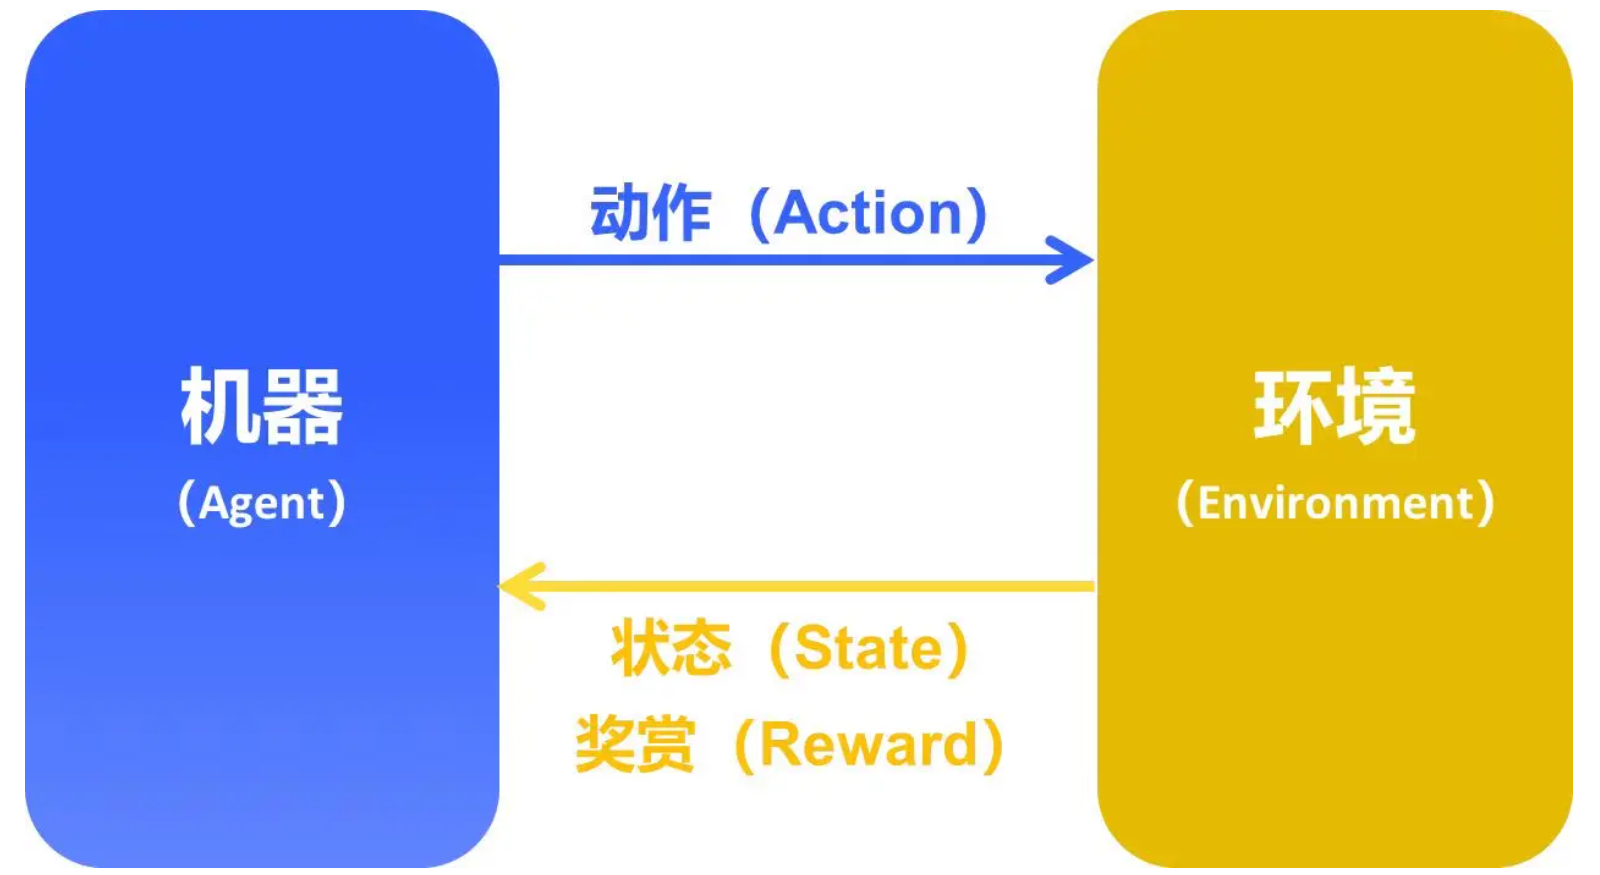    
## 1.基本概念
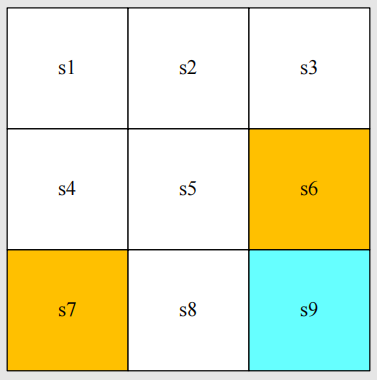    
`State`：agent在环境中说表现出来的状态，即$S_1,S_2,...,S_9$。其可能是个向量，包含多个信息，如位置、速度、加速度等。所有的State组成的集合称为`State Space`,即$S=\{S_1,S_2,...,S_9\}$。    

`Action`：agent在State下可以采取的动作，如上图每个State可以采取的动作有向左、向右、向上、向下、静止这5个Action。所有的Action组成的集合称为`Action Space`，即$A(S_i)=\{A_1,A_2,...,A_5\}$。由于Action与State密切相关，所以$A$表现为$S_i$的函数。  

`State Transition`：agent采取$a$从$s$到$s'$的过程。表现为概率形式称为`State Transition posibility`,即$P(s'|s,a)$。   
 
`Policy`：告诉agent在State要采取什么Action，记为$\pi(a|s)$。    

`Reward`：agent没执行一个Action所获得的奖励，其可以是一个确定值，也可以是一个随机值，且与State和Action有关，与下一步的State无关。

`Trajectory`: agent从初始状态开始，经过一系列Action后到达终止状态，可表示为$T=(s_0,a_0,r_1,s_1,a_1,r_2,s_2,...,s_T,a_T,r_T,s_T)$。有限步的Trajectory称为`Episode`。

`Return`: 把Trajectiry的Reward累加起来。事实上**Return是用来刻画Policy的好坏的指标**。当Trajectory是无限长时，会导致Return无法收敛，因此引入Discount rate $\gamma$,此时Return定义为$\sum_{t=0}^{\infty}\gamma^tr_t$。进一步分析，当$\gamma$足够小时，随着t增大，$\gamma^t$衰减的越快，故Return主要由近端的Reward决定，进而导致Policy相对**近视**,反之，当$\gamma$足够大时，导致Policy相对**远视**。

基于以上概念，我们引入`Markov Decision Process(MDP)`：
- Markov: 表现为**无历史性**，即当前状态只依赖于当前状态，不依赖于之前的状态。
$
\begin{array}{l}
p\left(s_{t+1} \mid a_{t+1}, s_{t}, \ldots, a_{1}, s_{0}\right) = p\left(s_{t+1} \mid a_{t+1}, s_{t}\right), \\
p\left(r_{t+1} \mid a_{t+1}, s_{t}, \ldots, a_{1}, s_{0}\right) = p\left(r_{t+1} \mid a_{t+1}, s_{t}\right).
\end{array}
$   
- Decision:可表现为Policy，agent在State下采取Action的概率。
- Process:由State $S$、Action $A(s)$、Reward $R(s,a)$、State Transition posibility $P(s'|s,a)$、Reward posibility $P(r|s,a)$组成。


## 2.贝尔曼公式  
我们定义`State Value (Function)`为：
$$
v_{\pi}(s) = \mathbb{E}\left[G_{t} \mid S_{t} = s\right]
$$
其中$G_t$为agent沿着一条Trajectory的Return。我们对从$s$出发所有的$G_t$求平均（期望），即得到`State Value`。其与初始状态$s$和策略$\pi$有关。事实上，当只存在一条trajectory时，State Value等于Return。   
为了描述不同State之间State Value的关系，对于**每一个State**,我们引入贝尔曼公式：   
$$
\begin{aligned}
v_{\pi}(s) &= \mathbb{E}\left[R_{t+1} \mid S_{t}=s\right] + \gamma \mathbb{E}\left[G_{t+1} \mid S_{t}=s\right], \\
&= \underbrace{\sum_{a} \pi(a \mid s) \sum_{r} p(r \mid s, a) r}_{\text{mean of immediate rewards}} + \underbrace{\gamma \sum_{a} \pi(a \mid s) \sum_{s'} p(s' \mid s, a) v_{\pi}(s')}_{\text{mean of future rewards}}, \\
&= \sum_{a} \pi(a \mid s) \left[ \sum_{r} p(r \mid s, a) r + \gamma \sum_{s'} p(s' \mid s, a) v_{\pi}(s') \right], \quad \forall s \in \mathcal{S}.
\end{aligned}
$$
其中$\pi(a \mid s)$为Policy，而$p(r \mid s, a)$为Reward posibility，$p(s' \mid s, a)$为State Transition posibility，这两个概率叫做`model`，根据model是否已知，我们把RL分为`model-free`和`model-based`两种。    
我们令：   
$$
\begin{aligned}
r_{\pi}(s) &\doteq \sum_{a \in \mathcal{A}} \pi(a \mid s) \sum_{r \in \mathcal{R}} p(r \mid s, a) r, \\
p_{\pi}(s' \mid s) &\doteq \sum_{a \in \mathcal{A}} \pi(a \mid s) p(s' \mid s, a).
\end{aligned}
$$   
事实上，前者为**immediate reward**，后者为**state transition probability**。重写贝尔曼公式：  
$$
v_{\pi}(s) = r_{\pi}(s) + \gamma \sum_{s' \in \mathcal{S}} p_{\pi}(s' \mid s) v_{\pi}(s')
$$ 
对于每一个State都满足贝尔曼公式，即我们会得到$|S|$个公式。我们可以把这些公式写成矩阵形式：   
$$
v_{\pi} = r_{\pi} + \gamma P_{\pi} v_{\pi}
$$
其中$v_{\pi}$和$r_{\pi}$为列向量，$P_{\pi}$是由State Transition posibility组成的方阵，$[P_{\pi}]_{ij}$为$p_{\pi}(s'=s_j \mid s=s_i)$。展开表现为：
$$
\underbrace{\left[\begin{array}{l}
v_{\pi}\left(s_{1}\right) \\ 
v_{\pi}\left(s_{2}\right) \\ 
v_{\pi}\left(s_{3}\right) \\ 
v_{\pi}\left(s_{4}\right)
\end{array}\right]}_{v_{\pi}} = 
\underbrace{\left[\begin{array}{l}
r_{\pi}\left(s_{1}\right) \\ 
r_{\pi}\left(s_{2}\right) \\ 
r_{\pi}\left(s_{3}\right) \\ 
r_{\pi}\left(s_{4}\right)
\end{array}\right]}_{r_{\pi}} + 
\gamma \underbrace{\left[\begin{array}{llll}
p_{\pi}\left(s_{1} \mid s_{1}\right) & p_{\pi}\left(s_{2} \mid s_{1}\right) & p_{\pi}\left(s_{3} \mid s_{1}\right) & p_{\pi}\left(s_{4} \mid s_{1}\right) \\
p_{\pi}\left(s_{1} \mid s_{2}\right) & p_{\pi}\left(s_{2} \mid s_{2}\right) & p_{\pi}\left(s_{3} \mid s_{2}\right) & p_{\pi}\left(s_{4} \mid s_{2}\right) \\
p_{\pi}\left(s_{1} \mid s_{3}\right) & p_{\pi}\left(s_{2} \mid s_{3}\right) & p_{\pi}\left(s_{3} \mid s_{3}\right) & p_{\pi}\left(s_{4} \mid s_{3}\right) \\
p_{\pi}\left(s_{1} \mid s_{4}\right) & p_{\pi}\left(s_{2} \mid s_{4}\right) & p_{\pi}\left(s_{3} \mid s_{4}\right) & p_{\pi}\left(s_{4} \mid s_{4}\right)
\end{array}\right]}_{P_{\pi}} 
\underbrace{\left[\begin{array}{l}
v_{\pi}\left(s_{1}\right) \\ 
v_{\pi}\left(s_{2}\right) \\ 
v_{\pi}\left(s_{3}\right) \\ 
v_{\pi}\left(s_{4}\right)
\end{array}\right]}_{v_{\pi}}
$$

对贝尔曼公式的求解实际上是解得State Value，进而我们可以评估当前的Policy。以下提出两种方法来求解：
- 矩阵方程求解(简单直白)：
$$
v_{\pi} = \left(I - \gamma P_{\pi}\right)^{-1} r_{\pi}
$$
可以证明$(I - \gamma P_{\pi})^{-1}$始终存在。但是当维度过高时，求逆的计算量太大。
- 迭代法求解(效率高)：
$$
v_{k+1} = r_{\pi} + \gamma P_{\pi} v_{k}, \quad k = 0, 1, 2, \ldots
$$
可以证明(压缩映射理论)，当迭代次数足够大，即$k \rightarrow \infty$时，$v_{\pi}$收敛到$(I - \gamma P_{\pi})^{-1}$。

State Value是agent从某个State出发所得到的平均期望，为了得到具体采取某个action对应的期望，我们定义`Action Value (Function)`：
$$
q_{\pi}(s, a) \doteq \mathbb{E}\left[G_{t} \mid S_{t}=s, A_{t}=a\right]
$$
对比State Value和Action Value的定义：
$$
\underbrace{\mathbb{E}\left[G_{t} \mid S_{t}=s\right]}_{v_{\pi}(s)} = \sum_{a \in \mathcal{A}} \underbrace{\mathbb{E}\left[G_{t} \mid S_{t}=s, A_{t}=a\right]}_{q_{\pi}(s,a)} \pi(a \mid s)
$$
上式可以表明，Stade Value等于在Policy下所有Action Value的加权和，对照贝尔曼公式，我们可以得到：
$$
q_{\pi}(s, a) = \sum_{r \in \mathcal{R}} p(r \mid s, a) r + \gamma \sum_{s' \in \mathcal{S}} p(s' \mid s, a) v_{\pi}(s')
$$


## 3.贝尔曼最优公式
RL的核心目的是找到最优Policy，我们定义**如果某个Policy下对应的State Value大于其它任何Policy下对应的State Value，则该Policy为最优Policy**。而贝尔曼最优公式给出了如何求解最优Policy。
$$
\begin{aligned}
v(s) &= \max_{\pi(s) \in \Pi(s)} \sum_{a \in \mathcal{A}} \pi(a \mid s) \left( \sum_{r \in \mathcal{R}} p(r \mid s, a) r + \gamma \sum_{s' \in \mathcal{S}} p(s' \mid s, a) v(s') \right) \\
&= \max_{\pi(s) \in \Pi(s)} \sum_{a \in \mathcal{A}} \pi(a \mid s) q(s, a)
\end{aligned}
$$
写成矩阵形式： 
$$
v = \max_{\pi \in \Pi} \left( r_{\pi} + \gamma P_{\pi} v \right)
$$
这个公式乍一看不好理解，因为似乎我们要通过一个式子求解两个未知数$v$和$\pi$。我们可以通过以下几步来求解：     
1、给等式右边的v(s`)赋一个初值    
2、求解最优化问题$\ \max_{\pi(s) \in \Pi(s)} \sum_{a \in \mathcal{A}} \pi(a \mid s) q(s, a)$,可证明其解为：
$$
\pi(a \mid s) = \begin{cases} 
1, & a = a^{*} \\ 
0, & a \neq a^{*}
\end{cases}
$$     
其中$a^{*}$对应$q(s, a^{*})$最大的Action。    
3、利用压缩映射原理，迭代求解得到$v^*$，直到收敛：
$$
v_{k+1} = f(v_{k}) = \max_{\pi \in \Pi} \left( r_{\pi} + \gamma P_{\pi} v_{k} \right), \quad k = 0, 1, 2, \ldots
$$

## 4. Model-Based RL
`Value iteration algorithm`:基于贝尔曼最优公式，我们将算法分为Policy update和Value update两个步骤,具体如下：
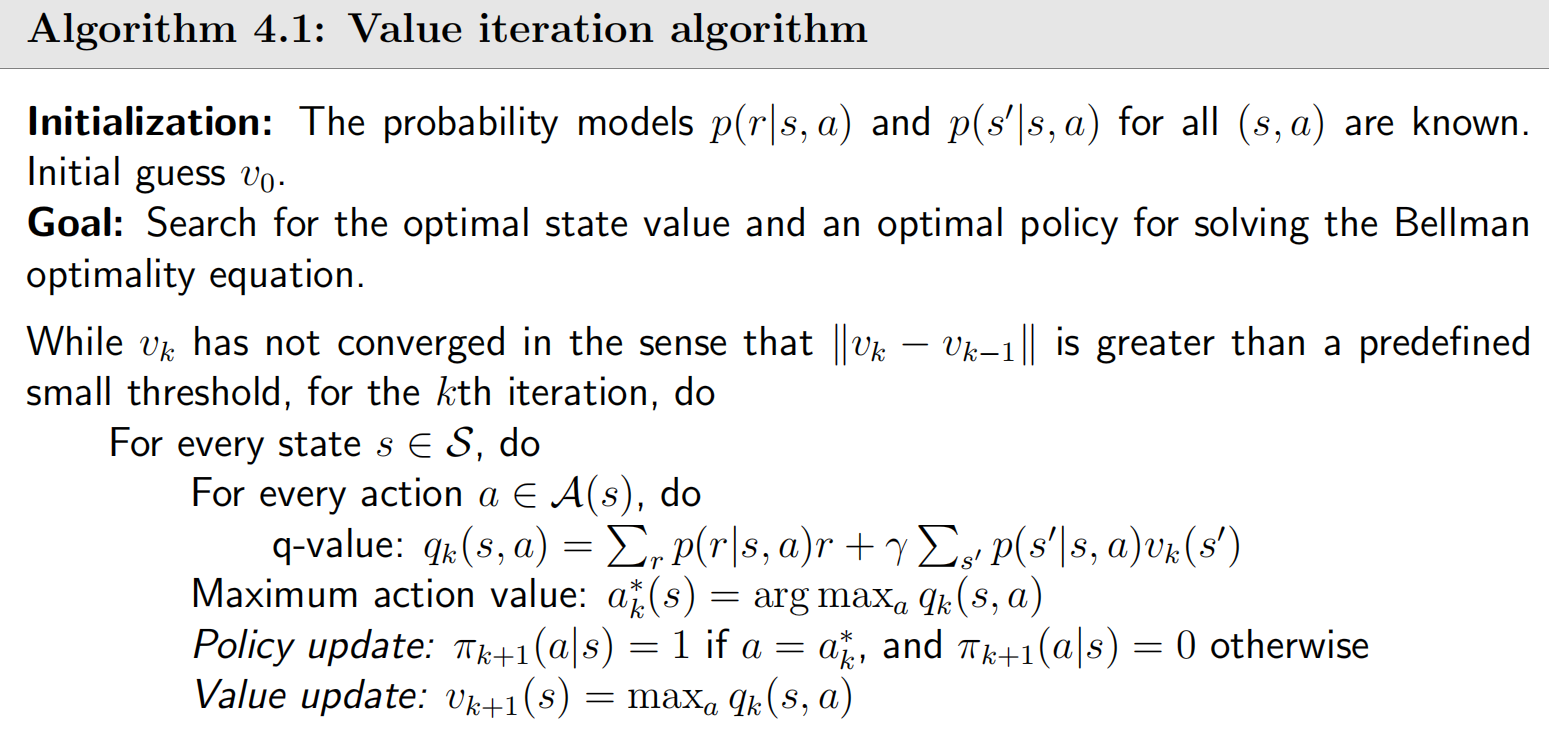     
`Policy iteration algorithm`:Value iteration algorithm是直接从一个初始的State Value开始的，而Policy iteration algorithm则是从一个初始的Policy开始的，通过迭代**无穷多次**求解贝尔曼公式先求出一个State Value，这一步可以理解为一个**策略评估**，然后在优化Policy，具体如下：
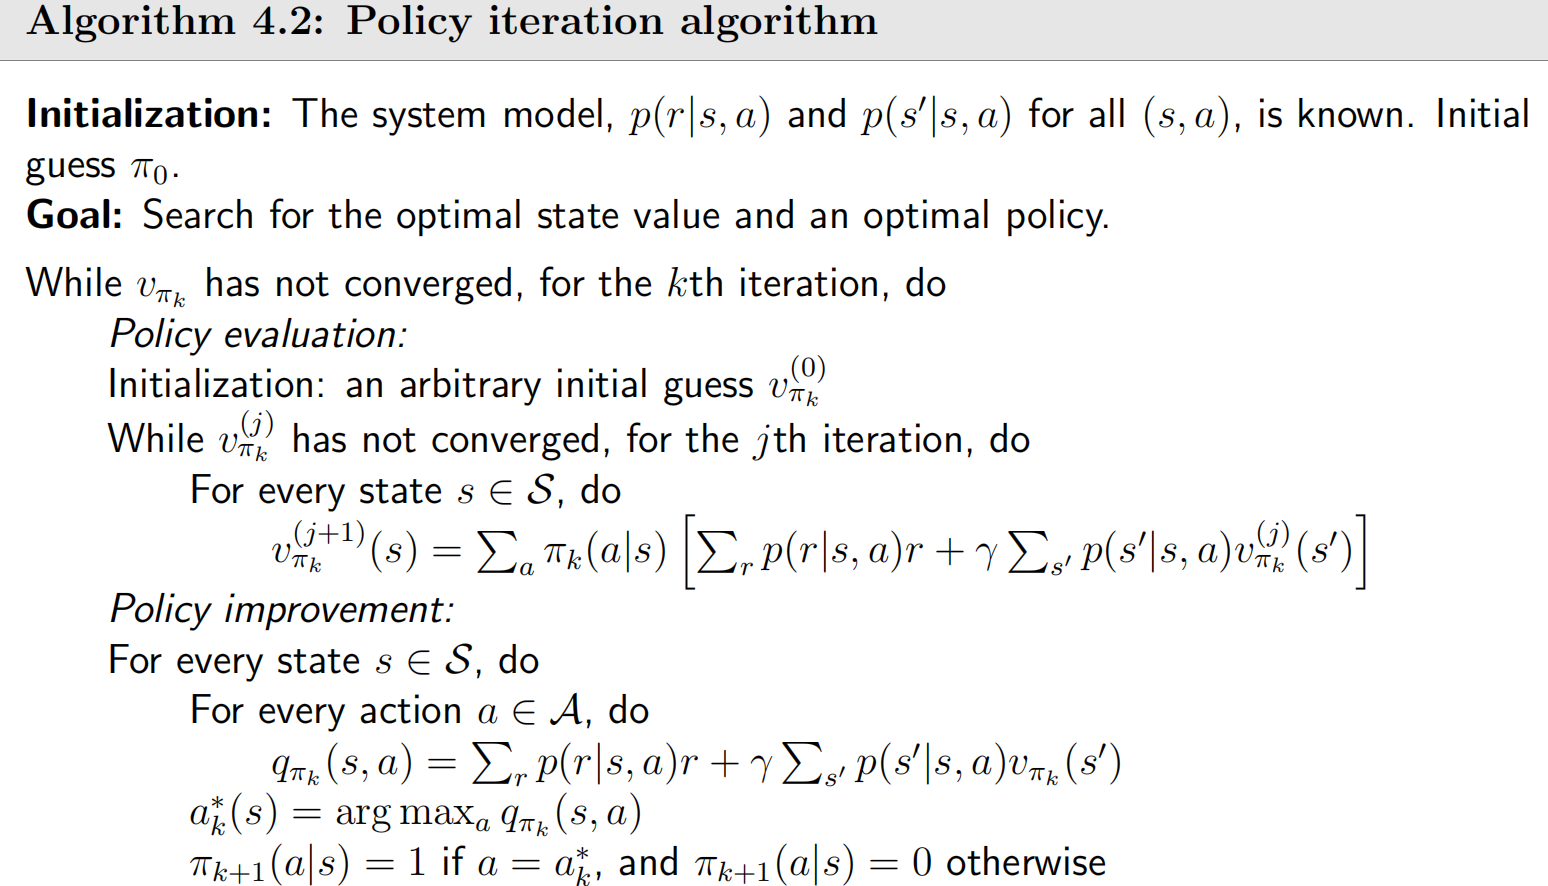    
而当我们求解贝尔曼公式的迭代次数是有限次时，则为`truncated policy iteration algorithm`     
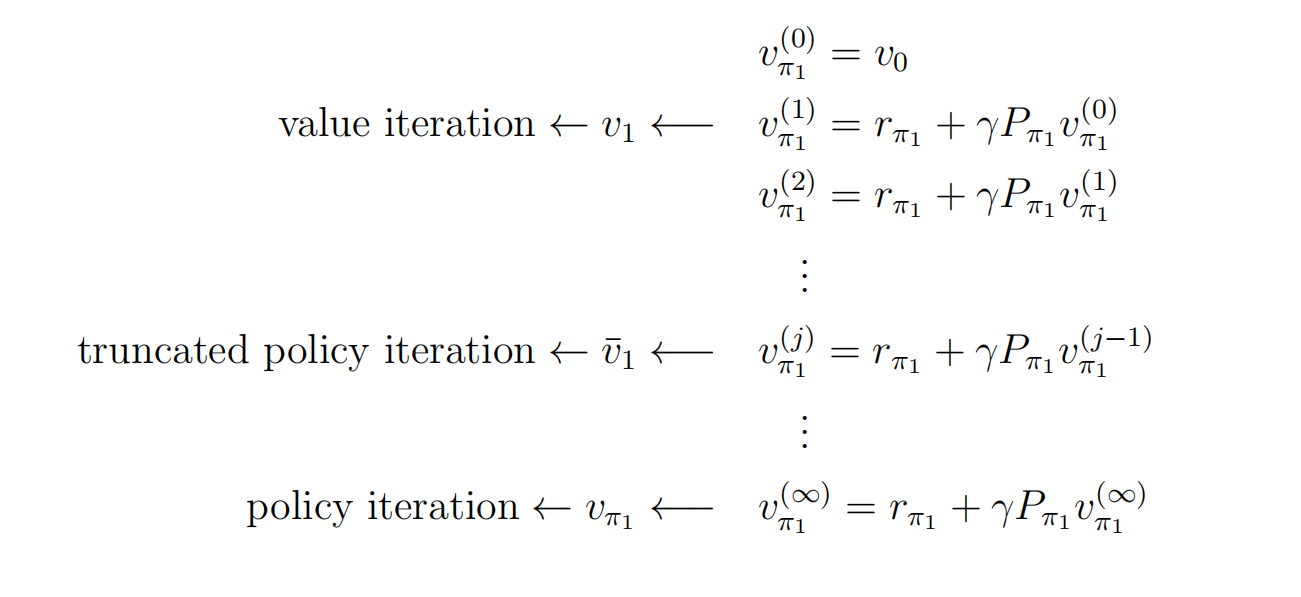

